In [ ]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df["job_skills"].apply(lambda Skill_list: ast.literal_eval(Skill_list) if pd.notna(Skill_list) else Skill_list)

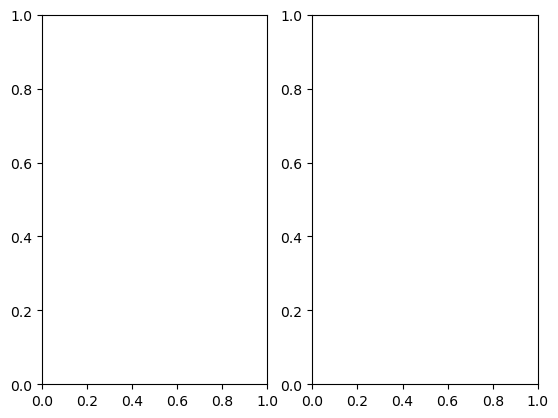

In [9]:
fig, ax = plt.subplots(1,2)


<Axes: xlabel='job_title_short'>

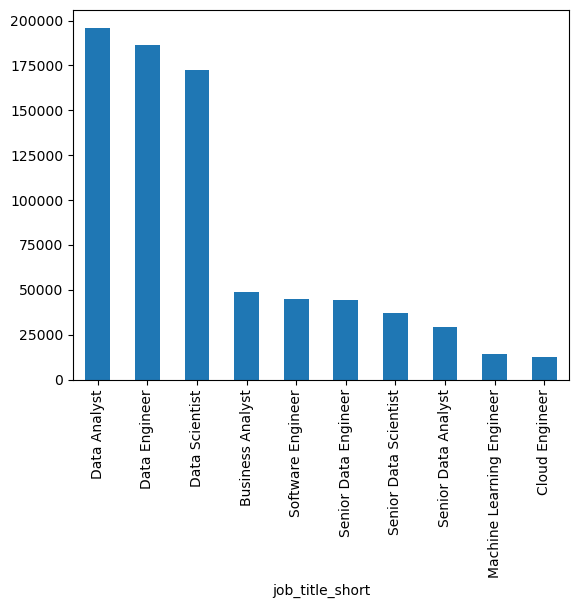

In [4]:
df['job_title_short'].value_counts().plot(kind='bar')

In [6]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [8]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

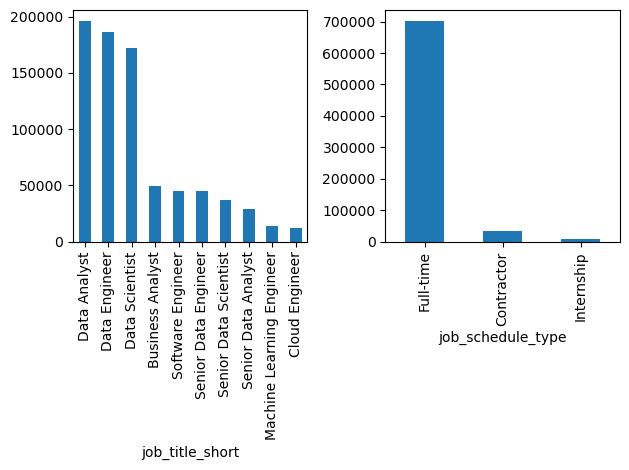

In [11]:
fig, ax = plt.subplots(1,2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])
fig.tight_layout()

In [12]:
df_expoloded = df.explode('job_skills') # Exploding the job skills column to have one skill per row
df_skills = df_expoloded.groupby(["job_title_short", "job_skills"]).size() # Counting the number of occurrences of each skill per job title 
df_skills_df = df_skills.reset_index(name='counts').sort_values(by='counts', ascending=False) # Converting to DataFrame and sorting
df_skills_df


,job_title_short,job_skills,counts
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [13]:
title_jobs = ["Data Scientist", "Data Analyst", "Data Engineer"]

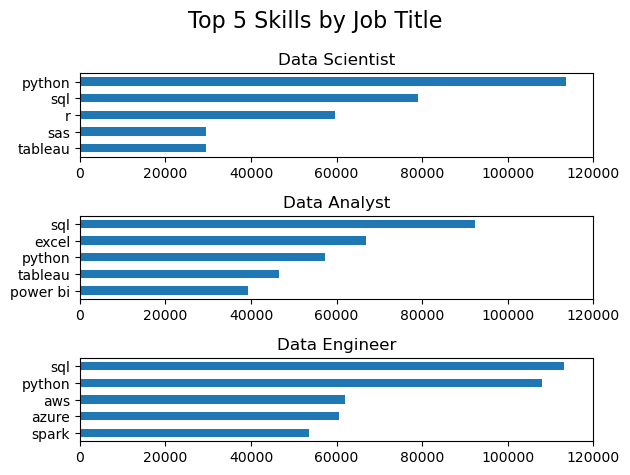

In [28]:
fig, ax = plt.subplots(3,1)

for i, title in enumerate(title_jobs): # Looping through the job titles
    df_title = df_skills_df[df_skills_df['job_title_short'] == title].head(5) # Filtering the DataFrame for the current job title and getting the top 5 skills
    df_title.plot(kind='barh', x='job_skills', y='counts', ax=ax[i], title=title) # Plotting a horizontal bar chart
    ax[i].invert_yaxis()  # Invert y-axis to have the highest count on top
    ax[i].set_ylabel('')  # Removing y-axis label for cleaner look
    ax[i].legend().remove()  # Removing legend for cleaner look
    ax[i].set_xlim(0, 120000)
fig.suptitle('Top 5 Skills by Job Title', fontsize=16)  # Adding a main title for the figure
fig.tight_layout()  # Adjust layout to prevent overlap